<a href="https://colab.research.google.com/github/Angorith/acorn_python/blob/main/0621_31%EC%9D%BC%EC%B0%A8_AI(%EB%94%A5%EB%9F%AC%EB%8B%9D)%5BOptimizer%5BSGD%2C_Momentum%2CAdegrad%2CDropout%5D%2CKeras%5BModelset%2C_Model_fit%2CDense%2Ccompile%2C%ED%8F%89%EA%B0%80(Evaluation)%EC%99%80_%EC%98%88%EC%B8%A1(Prediction)_%5D%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

6.1.2 확률적 경사 하강법 (SGD)

최적화 : 손실 함수의 값을 가능한 낮추는 매개변수를 찾는 문제를 푸는 것

확률적 경사 하강법(SGD) :매개변수 기울기를 구해 기울어진 방향으로 매개변수 값을 갱신하여 점점 최적의 매개변수로 다가가는 방법, 전체 데이터에 대해서 GD를 수행하는 것이 아니라 일부 데이터를 무작위로 선택하여 하기 때문에 확률적 방식이라 일컬음

식 6.1 SGD 

$$
W \leftarrow W - η{∂L}\over {∂W}
$$


SGD 파이썬 클래스

In [ ]:
class SGD:
    def __init__(self, lr= 0.01):   #lr = eta(학습률)
        self.lr = lr

    def update(self, params , grads):
        for key in params.key():
            params[key] -= self.lr + grads[key]

In [ ]:
optimizer = SGD()
#optimizer.update(params, grads)    사용예시

In [ ]:
optimizer.update(params, grads)

6.1.3 모멘텀

모멘텀 : Momentum 운동량

$$
h <- h + ∂L ∂W

$$
$$
{u_n} ← {av} - {{\eta} {{∂L} \over {∂W}}}
$$


v : 물리에서 말하는 속도(velocity)

식 6.5



식 6.6
$$
W <- W +v
\\
W : 갱신할 매개변수
\\
{{∂L} \over {∂W} }: 손실함수의 기울기
\\
n : 학습률, 미리 정해서 사용
$$



$$
V_n = aVn - 1 - nf(X_n), v-1 = 0
\\
Xn+1 = X_n + V_n
$$


$$
α = 0.9,0.03
$$

In [ ]:
import numpy as np

In [ ]:
class Momentum:
    def __init__(self, lr = 0.01, momentum = 0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

parameter : W1, b1, W2, b2

$$
v_0 = 0.9 *v_-1 - \eta* grad_0
\\
v_0 = -\eta*grad_0
\\
v_1 = 0.9 * v_0 -\eta*grad_1
$$

6.1.5 AdaGrad

학습률 감소 (learning rate decay) : 학습을 진행하면서 학습률을 점차 줄여가는 방법

개별 매개변수에 적응적으로(adative) 학습률을 조정하면서 학습을 진행

$$
h ← αh + (1 - α)({{∂L} \over {∂w}})^2
$$

AdaGrad 구현

In [ ]:
class AdeGrad:
    def __init__(self, lr = 0.01):
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key])+ 1e-7)

In [ ]:
class AdeGrad:
    def __init__(self, lr = 0.01):
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key])+ 1e-7)

6.4.3 드롭아웃

신경망 모델이 복잡해지면 가중치 감소만으로는 대응하기 어려움

드롭아웃 : 뉴런을 임의로 삭제하면서 학습하는 방법

훈련때에는 데이터를 흘릴 때만다 삭제일 뉴런을 무작위로 선택.

시험때에는 모든 뉴런에 신호를 전달. 각 뉴런의 출력에 훈련 때 삭제한 비율을 곱하여 출력.

드롭아웃 구현
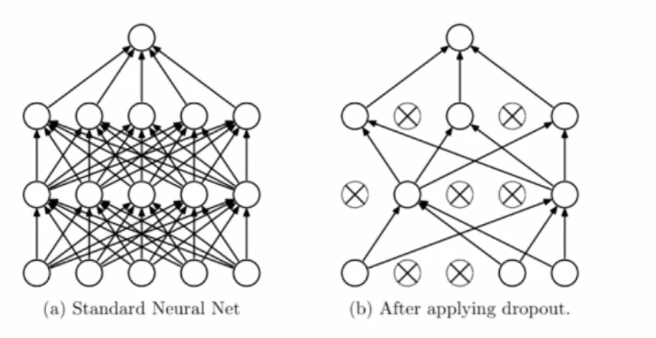

In [ ]:
class Dropout:
    def __init__(self, dropout_ratio = 0.5):
        self.dropout_ratio = dropout_ratio  #뉴런 수의 50% drop
        self.mask = None

    def update(self, x, train_fig = True):
        if train_fig:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio

            return x * self.mask    #True값만 살고 False값은 위의 그림 같이 사라진다
        else:
            return x * (1.0 - self.dropout_ratio)   #forward 의 False인경우 시험때에는 훈련때 삭제한 비율값과 곱 

    def backward(self, dout):
        return dout * self.mask 

In [ ]:
#예제

x  = np.array([[1,2], [3,4]])
x.shape

(2, 2)

In [ ]:
np.random.rand(*x.shape)# *튜플 언팩

array([[0.82069967, 0.51844852],
       [0.67201583, 0.92006064]])

In [ ]:
np.random.rand

케라스 소개

- 케라스는 파이썬으로 작성된 오픈소스 신경망 라이브러리다.

- feed forward(순전파)

: 입력층으로ㅠ 데이터가 입력되고, 1개 이상으로 구성되는 은닉층을 거쳐서 마지막 층으로 출력값을 내보내는 과정

딥러닝에서는, 이전 층에서 나온 출력밧이 층과 층 사이에서 작용되는 가중치 영향을 받은 다음, 다음층의 입력값으로 들어가는 것을 의미

- 입력층 출력

: 딥러닝 입력층에서는 활성화 함수인 sigmoid 를 작용하지 않고, 입력값 그대로 출력으로 내보내는 것이 관례화 되어 있다. 

- 프레임 워크 
: 특정 프로그램을 개발하기 위한 여로 요소들과 메뉴얼인 툴을 제공하는 프로그램

- 라이브러리

:프로그램 개발을 위해 공구와 같은 도구들

공통점 : 프로그램을 쉽게 만들 수 있게 하는 공통된 목적이 있음

차이점 : 자유도, 프레임 워크는 꼭 써아되는 것과 지켜야 되는 룰이 있다. 라이브러리는 쓰든 안쓰든 자기 마음이다.

- 케라스는 프레임워크 마이그레이션 작업을 위한 Wrapper : 프레임 워크 전환 작업을 위한 래퍼

- 케라스의 백앤드 엔진

: 텐서플로, 테아노, CNTK

- 케라스는 텐서프롤 래퍼 라이브러리이다.

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Dense, Activation

In [ ]:
model = Sequential()
model.add(Dense(64))

In [ ]:
model.add(Dense(64, activation='tanh'))

In [ ]:
model.add(Activation('tanh'))

모델 구축 순서

- kreas.models 에서 Sequential 클래스를 가져온다.
- add() 메서드를 이용해 레이어를 쌓는다.
- compile() 메서드를 사용해 학습과정을 구성한다.
- fit() 메서드를 사용해 훈련 데이터셋에서 모델을 훈련시킨다.

model.fit은 client에 있다. 모듈로 넣지 않는다. 데이터가 직접 들어가는 곳이기 때문이다. 



 프로그래머가 epoch를 실험을 하는데 0~100까지 다 할 수 없으니 5, 10 , 20, 40, 80 까지 해서 하는것이 실험 계획법이다. 제일 많이 쓰는곳은 반도체 공장



In [ ]:
model  = Sequential()
model.add(Dense(32, activation='relu', input_dim=100 ))
model.add(Dense(1, activation='sigmoid'))

- Dense

: 완전 연결층, 입력층과 출력층이 모두 연결되어 있는 것을 의미

- 첫번째 위치 인자(Positional Argument)

:출력 노드수 (뉴런 수)

- activation

linear: 디폴트 값으로 별도 활성화 함수 없이 입력 뉴런과 가중치의 계산 결과 그대로 출력

sigmoid : 이진 분류 문제에서 출력층에 주로 사용되는 활서ㅓㅇ화 함수

softmax : 셋 이상의 선택지 중 하난를 택하는 다중 클래스 분휴 문제에서 출력층에서 주로 사용되는 활성화 함수

relu: 


:자료의 특성 개수를 의미하며, 보통, DataFrame의 column개수와 일치한다.
예) mnist의 경우 784(= 28*28) 이 된다.

In [ ]:
model = Sequential()
model.add(Dense(1, input_dim=3, activation='relu'))

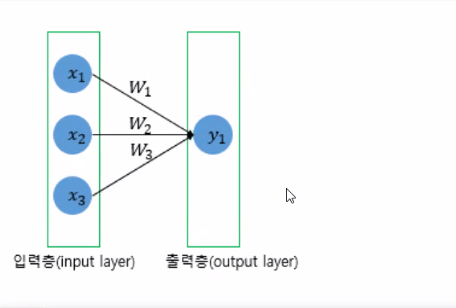

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim= 4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

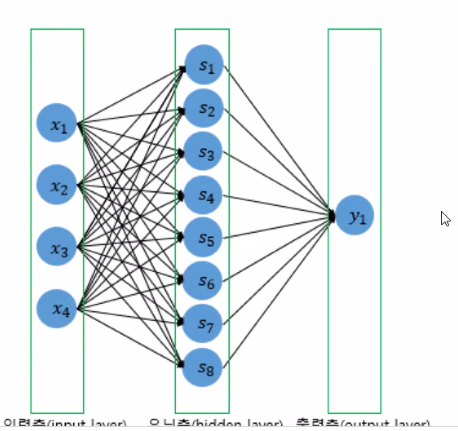

컴파일

compile(): 모델을 기계가 이해할 수 있도록 변환.
손실 함수와 옵티마이저, 메트릭 함수를 선택합니다.

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

- optimizer = 훈련 과정을 설정하는 옵티마이저를 설정
- loss = 훈련 과정에서 사용할 손실 함수 (loss function) 를 설정

- metrics = 훈련을 모니터링 하기 위한 지표를 선택

경사 하강법

확률적 경사 하강법(SGD)

:확률적으로 무작위 골라낸 데이터에 대해 수행하는 경사 하강법. 미니배치를 사용해 무작위로 선정한 데이터에 대해 경사 하강법을 쓰기 때문임.

모멘텀 : 국소 최소점을 벗어날 수 있도록 SGD식에 가중치의 1차식을 더해 준 방식

AdaGrad : 고정된 학습률이 아닌 변화하는 학습률을 사용하게 해주는 옵티마이저

rmsprop : AdaGrad 에서 학습률이 줄어드는 문제를 해결하기 위한 옵티마이저

Adma : 모멘텀 + AdaFrad(RMSPROP)

sparse_categorical_crossentropy는 categorical_crossentropy와 동일하게 다중 클래스 분류에서 사용하지만, 레이블을 원-핫 인코딩하지 않고 정수 인코딩 된 상태에서 수행 가능 하다는 점이 다르다.

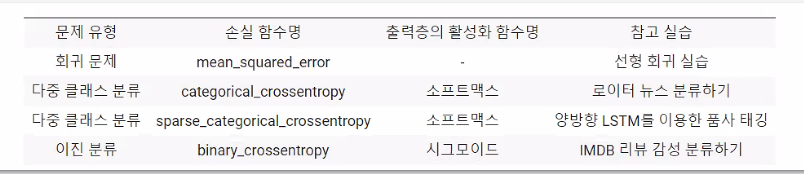

fit : 훈련시키기

fit() : 모델을 학습합니다. 모델이 오차로 부터 매개변수를 업데이트 시키는 과정을 학습, 훈련 또는 적합(fitting)이라고 하는데, 모델이 데이터에 적합해 가는 과정이기 때문. 그런 의미에서 fit()은 모델의 훈련을 시작합니다.

In [ ]:
#예제 코드
model.fit(X_train, y_train, epochs=10, batch_size=32)

NameError: ignored

첫번째 인자 = 훈련 데이터에 해당

두번쨰 인자 = 지도 학습에서 레이블 데이터에 해당

epochs= 에포크 , 에포크1은 전체데이터를 한차례 훓고 지나갔음을 의미함. 정수값 기재 필요. 총 훈련 횟수를 정의함

batch_size = 배치 크기. 기본값 32, 미니 배치 경사 하강법을 사용하고 싶지 않을 경우에는 batch_size = None을 기재함

- batch

:전체 데이터중 일부만을 취하는 것.
예시) 20000개중 100개만 취했을 경우 100이 batch의 크기다.

- epoch

:전체 데이터를 모두 학습에 1번 사용할 때까지 걸린 반복횟수

즉 , 전체 데이터 개수가 2000개이고, batch =500이면, 1 epoch는 4이다.

이 경우, 모델 훈련 시 10 epoch를 사용하게 설정하면, 모델은 학습을 4*10 = 40 번 반복하게 되는 것이다. 이때 한번에 사용되는 데이터의 갯수는 500이다.

In [ ]:
#예제 코드
#model.fit(X_train, y_train, epochs =10, batch_size=32, verbose= 0, validation_data(X_val, y_val))

validation_data(x_val, y_val) = 검증데이터(validation data)를 사용. 일반적으로 검증 데이터를 사용하면 각 에포크마다 검증 데이터의 정확도나 오차를 함께 출력하는데, 이 정확도는 훈련이 잘 되고 있는지를 보여줄 뿐이며 실제로 모델이 검증데이터를 학습하지 않습니다. 검증데이터의 오차(loss)가 낮아지다가 높아지기 시작하면 이는 과적합(overfitting)의 신호입니다.

In [ ]:
#예제 코드
#model.fit(X_train, y_train, epochs =10, batch_size=32, verbose= 0, validation_split=0.2)

validation_split = validation_data와 동일하게 검증 데이터를 사용하기 위한 용도로 validation_data 대신 사용할 수 있습니다. 검증 데이터를 지정하는 것이 아니라 훈련 데이터와 훈련 데이터의 레이블인 X_train 과 y_train에서 일정 비율 분리하여 이를 검증 데이터로 사용합니다.

verbose = 학습 중 출력되는 문구 설정

- 0 : 아무것도 출력 하지 않는다

- 1 : 훈련의 진행도를 보여주는 진행 막대를 보여줌

- 2 : 미니 배치마다 손실 정보를 출력합니다.

# 평가(Evaluation)와 예측(Prediction) 

matrics= accuracy 값 찾기



In [ ]:
#model.evaluate(X_test, y_test, batch_size = 32)

evaluate(): 테스트 데이터를 통해 학습한 모델에 대한 정확도를 평가합니다. 

첫번째 인자 = 테스트 데이터를 통해 학습한 모델에 대한 정확도를 평가합니다.

두번째 인자 = 지도 학습에서 레이블 테스트 데이터에 해당됩니다.

batch_size = 배치 크기

predict(): 임의의 입력에 대한 모델의 출력값을 확인

In [ ]:
#model.gredict(X_input, batch_size= 32)

첫번째 인자 = 예측하고자 하는 데이터

batch_size = 배치 크기

모델의 저장(Save)와 불러오기(load)

In [ ]:
#model.save('model_name.h5')

save(): 인공 신경망 모델을 hdf5파일에 저장

In [ ]:
#from tensorflow.keras.models import load_model
#model = load_model('model_name.h5')

load_model():저장된 모델을 불러옴